# An Exploration of the Top 80 Tennis Player's

## Data Exploration and Validation

To start, install and import pandas and some visualization libraries.

In [1]:
pip install -r requirements.txt

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
tennis = pd.read_csv("tennis_player_data.csv")
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won,Unnamed: 21
0,Daniil Medvedev,8,Two-Handed Backhand,2845,1187,60,75,52,1897,63,...,66,31,54,2664,42,4238,26,39,52,NaN
1,Alexander Zverev,9,Two-Handed Backhand,3974,1973,65,74,50,2709,61,...,66,31,51,3631,42,6045,25,38,52,NaN
2,Novak Djokovic,19,Two-Handed Backhand,6440,2672,65,74,55,6017,66,...,67,34,55,10278,44,14179,32,42,54,NaN
3,Rafael Nadal,21,Two-Handed Backhand,3856,2066,68,72,57,6309,67,...,67,34,55,10943,45,14633,34,42,55,NaN
4,Casper Ruud,7,Two-Handed Backhand,986,461,65,72,54,1137,63,...,66,29,51,1424,41,2466,24,37,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,Two-Handed Backhand,4455,2722,52,74,45,4219,60,...,60,31,49,3853,40,6548,23,38,49,NaN
76,James Duckworth,12,Two-Handed Backhand,1096,398,56,72,50,1028,64,...,63,25,47,736,37,1719,16,33,48,NaN
77,Denis Kudla,12,Two-Handed Backhand,1078,637,58,70,51,1390,58,...,62,26,49,1109,40,2392,19,35,48,NaN
78,Tomas Martin Etcheverry,5,Two-Handed Backhand,35,23,71,64,45,98,61,...,58,27,51,58,34,121,17,36,47,NaN


In [4]:
tennis = tennis.drop('Unnamed: 21', axis = 1)

The backhand column has 2 values 'One-Handed Backhand' and 'Two-Handed-Backhand' so we can make these numerical dummy values.

In [5]:
tennis['backhand_type'] = tennis['backhand_type'].apply(lambda x: 2 if x.strip() == 'Two-Handed Backhand' else 1)

In [6]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,service_games_won,total_service_points_won,1st_serve_return_won,2nd_serve_return_won,total_break_pts,break_pts_conv,return_games_played,return_games_won,return_points_won,total_pts_won
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,83,66,31,54,2664,42,4238,26,39,52
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,82,66,31,51,3631,42,6045,25,38,52
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,86,67,34,55,10278,44,14179,32,42,54
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,86,67,34,55,10943,45,14633,34,42,55
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,83,66,29,51,1424,41,2466,24,37,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,74,60,31,49,3853,40,6548,23,38,49
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,78,63,25,47,736,37,1719,16,33,48
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,76,62,26,49,1109,40,2392,19,35,48
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,69,58,27,51,58,34,121,17,36,47


Off the bat, there are a couple things we can add pretty easily:

In [7]:
tennis['total_service_games_won'] = tennis['service_games_played'] * 0.01*tennis['service_games_won']

tennis['total_return_games_won'] = tennis['return_games_played'] * 0.01*tennis['return_games_won']

tennis["total_games_played"] = tennis["service_games_played"] + tennis["return_games_played"]
tennis["total_games_won"] = tennis["total_service_games_won"] + tennis["total_return_games_won"]

tennis['total_break_points_saved'] = tennis['break_points_faced'] * 0.01*tennis['break_points_saved']



Notice that some columns are percentages and some are amounts. Percentages are a good metric to use to compare players, however these are career stats, so when comparing for example the amount of double faults a player has, we have to consider how many years they have been playing.

We can deal with this by averaging that number over the years a player has been active. This may not be ideal because players deal with injury, time-off, etc., but it is definitely an improvement

In [8]:
amnt_columns = ['aces', 'double_faults','break_points_faced', 'service_games_played',
                'total_break_pts', 'return_games_played', 'total_break_points_saved', 
                'total_return_games_won', 'total_service_games_won', 'total_games_played',
                'total_games_won']

In [9]:
for col in amnt_columns:
    tennis[f"avg_{col}_yr"] = tennis.apply(lambda x: x[col]/float(x['career_length']), axis = 1)

In [10]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,181.466667,281.266667,435.266667,256.866667,436.533333,168.760000,100.402667,322.097333,871.800000,422.500000
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000


### Serving

An ace is when a player serves and the other player can't return it. Usually the placement or speed is just out of reach of the player and he is simply unable to return the ball.

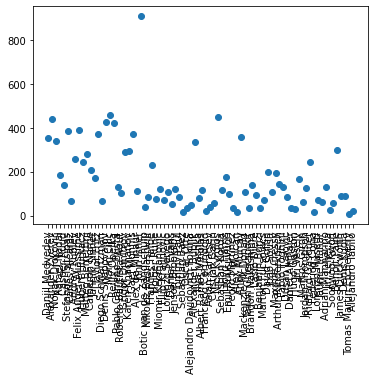

In [11]:
plt.scatter(tennis["player"], tennis["avg_aces_yr"])
plt.xticks(rotation = 90)
plt.show()

The plat is a bit messy, but there is a general trend, most players tend to serve between 40 and 400 aces per year. This makes sense, especially since there is a slight negative relationship between ranking (right to left is rank 1 -80) and amount of aces.

There is one major outlier, serving an average of over 800 aces per year, lets explore some more.

In [12]:
tennis.sort_values(by=['avg_aces_yr'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,111.600000,195.733333,699.000000,234.733333,691.400000,138.970667,69.140000,643.080000,1390.400000,712.220000
16,Marin Cilic,17,2,7778,2521,57,77,52,4890,64,...,148.294118,287.647059,634.705882,369.176471,627.058824,184.094118,144.223529,533.152941,1261.764706,677.376471
44,Nick Kyrgios,9,2,4035,945,66,77,53,1279,67,...,105.000000,142.111111,405.555556,166.444444,404.111111,95.214444,64.657778,356.888889,809.666667,421.546667
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
15,Denis Shapovalov,5,1,2130,1370,59,76,52,1610,66,...,274.000000,322.000000,671.600000,344.200000,670.000000,212.520000,127.300000,564.144000,1341.600000,691.444000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Alejandro Tabilo,7,2,143,90,64,68,48,220,56,...,12.857143,31.428571,49.571429,28.857143,47.285714,17.600000,12.767143,35.691429,96.857143,48.458571
49,Alex Molcan,7,2,128,83,65,67,53,238,56,...,11.857143,34.000000,63.428571,40.857143,62.714286,19.040000,16.932857,48.205714,126.142857,65.138571
35,Sebastian Baez,4,2,65,61,73,64,53,286,60,...,15.250000,71.500000,112.750000,79.750000,114.250000,42.900000,31.990000,84.562500,227.000000,116.552500
69,Federico Coria,12,2,180,178,66,62,49,644,57,...,14.833333,53.666667,71.166667,44.833333,72.250000,30.590000,19.507500,47.681667,143.416667,67.189167


This may seem like an error, but it isn't. John Isner is widely known in the tennis community for having monster serves, sometimes he is referred to as a 'serve bot'. He has been active for 15 years, and has served 13,634 aces. He serves about 400 more aces per year than anyone else on tour.

Aces are only part of the equation, let's look at some other serving statistics.

Tennis players are given 2 serves for each point, if both go out this is called a 'double fault' and results in a loss of the point.

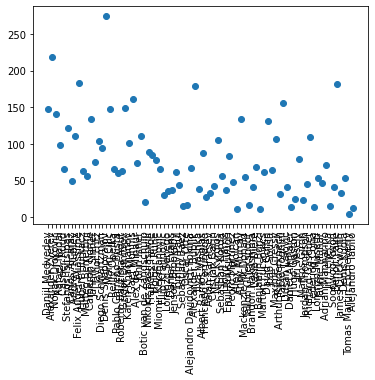

In [13]:
plt.scatter(tennis["player"], tennis["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

There is a negative relationship with ranking and average double faults with some outliers.

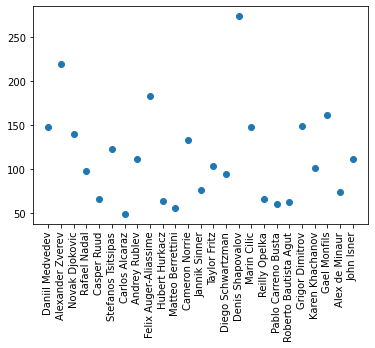

In [14]:
plt.scatter(tennis.iloc[0:25]["player"], tennis.iloc[0:25]["avg_double_faults_yr"])
plt.xticks(rotation = 90)
plt.show()

The biggest outlier is Denis Shapovalov, there is no explanation other than nerves, etc. Alexander Zverev is another outlier, at rank 2 his double faults are quite high, he has a solid game if his serves do go in so that helps, and indicates that double faults aren't as important as other statistics.

In the end, it matters who is winning their service games, so lets take a look.

In [15]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,181.466667,281.266667,435.266667,256.866667,436.533333,168.760000,100.402667,322.097333,871.800000,422.500000
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000


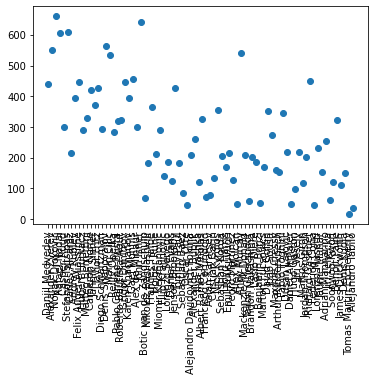

In [16]:
plt.scatter(tennis["player"], tennis["avg_total_service_games_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We see that signature negative relationship again, which makes sense. Let's zoom in on the top 30 where the pattern is less obvious.

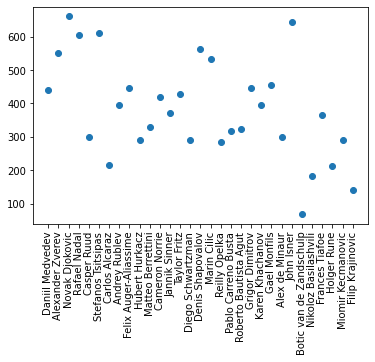

In [17]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_service_games_won_yr"])
plt.xticks(rotation = 90)
plt.show()

We can see our old friend John Isner has stats similar to Novak Djokovic and Rafa Nadal, considered to be the best in the sport (maybe I'll add Roger Federer to the data later) due to his strong serving skills. This stat of course relies on the amount of matches played in a year, but to be in the top 30 you have to play a lot and win a lot.

The last serving statistic we will look at is break points saved. A break point is when the player you are serving against has the chance to win the game on your serve. A players ability to save these is a good reflection of how they handle pressure and if they can focus and stop their opponent.

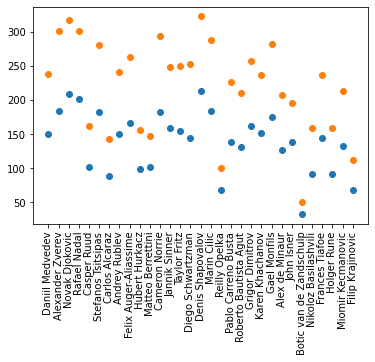

In [18]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_break_points_saved_yr"])
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This shows the avg break points faced and the avg break points saved, but its hard to tell what's actually going on.

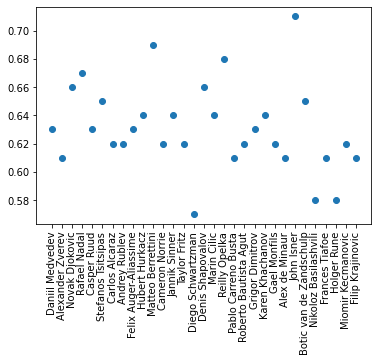

In [19]:
plt.scatter(tennis.iloc[0:31]["player"], tennis.iloc[0:31]["avg_total_break_points_saved_yr"]/
                                tennis.iloc[0:31]["avg_break_points_faced_yr"])
plt.xticks(rotation = 90)
plt.show()

This plot shows the percentage of break points saved by the player, the highest percentage is.... John Isner! If he faces a break point he will just serve an ace and be right back in it! Some other notable players are Matteo Berrettini and Riley Opelka, if you recall, these players also have very good serves/ace rates, so this definitely helps with saving break points.

The lowest we see is Diego Schwartzman, I know his serve is pretty weak because he is one of the shortest players on tour, where John Isner is one of the tallest.

We have explored several metrics, and now I would like to quantify them into one, which would give me the ability to rank all the players based on their serves and service games.

- Aces
- Double Faults
- Service Games Won
- Break Points Saved

In [20]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,181.466667,281.266667,435.266667,256.866667,436.533333,168.760000,100.402667,322.097333,871.800000,422.500000
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000


In [21]:
tennis.columns

Index(['player', 'career_length', 'backhand_type', 'aces', 'double_faults',
       'first_serve', '1st_serve_points_won', '2nd_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won', '1st_serve_return_won',
       '2nd_serve_return_won', 'total_break_pts', 'break_pts_conv',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_pts_won', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr'],
      dtype='object')

We need to normalize the data and then we can combine the metrics, as they will all be on the same scale.

- Min-Max normalization  
    - Good for data without outliers
    - Everything on scale of 0 - 1

In [22]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,148.375000,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,219.222222,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,140.631579,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,98.380952,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,65.857143,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,181.466667,281.266667,435.266667,256.866667,436.533333,168.760000,100.402667,322.097333,871.800000,422.500000
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,33.166667,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,53.083333,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,4.600000,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000


In [23]:
normalize = ['aces', 'double_faults','break_points_faced', 'service_games_played',
       'total_service_points_won', 'total_break_pts',
       'return_games_played', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr']

percents = ['first_serve', '1st_serve_points_won', '2nd_serve_points_won',
        'break_points_saved', 'service_games_won', '1st_serve_return_won',
        '2nd_serve_return_won', 'break_pts_conv', 'return_games_won',
        'return_points_won', 'total_pts_won']

In [24]:
normalized = tennis.copy()
for n in normalize:
    # normalize
    normalized[n] = (normalized[n]-normalized[n].min())/(normalized[n].max()-normalized[n].min())

Make the percent's between 0 and 1

In [25]:
normalized[percents] = 0.01*normalized[percents]

In [26]:
normalized

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_double_faults_yr,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr
0,Daniil Medvedev,8,2,0.206633,0.402211,0.60,0.75,0.52,0.289990,0.63,...,0.533686,0.719329,0.678927,0.607163,0.700147,0.685231,0.569351,0.656329,0.689386,0.633072
1,Alexander Zverev,9,2,0.289654,0.673808,0.65,0.74,0.50,0.420663,0.61,...,0.796667,0.930556,0.870117,0.740241,0.896690,0.855856,0.697953,0.829227,0.883215,0.794126
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.953009,0.66,...,0.504943,0.982421,1.000000,1.000000,1.000000,0.982507,1.000000,1.000000,1.000000,1.000000
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,1.000000,0.67,...,0.348110,0.928666,0.914582,0.962497,0.931511,0.943994,0.991951,0.915133,0.922926,0.935674
4,Casper Ruud,7,2,0.069932,0.151348,0.65,0.72,0.54,0.167686,0.63,...,0.227384,0.472317,0.453496,0.362387,0.454373,0.450599,0.342727,0.440166,0.453928,0.414111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,0.325024,0.932619,0.52,0.74,0.45,0.663663,0.60,...,0.656521,0.865300,0.553085,0.463338,0.571049,0.781815,0.410280,0.474738,0.561940,0.457502
76,James Duckworth,12,2,0.078020,0.129578,0.56,0.72,0.50,0.150145,0.64,...,0.106038,0.218474,0.161111,0.093952,0.164875,0.213751,0.080131,0.148596,0.162966,0.130289
77,Denis Kudla,12,2,0.076697,0.212163,0.58,0.70,0.51,0.208400,0.58,...,0.179968,0.318232,0.233915,0.152672,0.242546,0.275360,0.143846,0.208038,0.238169,0.190874
78,Tomas Martin Etcheverry,5,2,0.000000,0.000000,0.71,0.64,0.45,0.000483,0.61,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Now we have a completely normalized dataframe, so we can combine some metrics!

In [27]:
# double faults are bad, the best score right now means most double faults, lets fix that!
normalized["avg_double_faults_yr"] = 1 - normalized["avg_double_faults_yr"]

In [28]:
normalized.columns

Index(['player', 'career_length', 'backhand_type', 'aces', 'double_faults',
       'first_serve', '1st_serve_points_won', '2nd_serve_points_won',
       'break_points_faced', 'break_points_saved', 'service_games_played',
       'service_games_won', 'total_service_points_won', '1st_serve_return_won',
       '2nd_serve_return_won', 'total_break_pts', 'break_pts_conv',
       'return_games_played', 'return_games_won', 'return_points_won',
       'total_pts_won', 'total_service_games_won', 'total_return_games_won',
       'total_games_played', 'total_games_won', 'total_break_points_saved',
       'avg_aces_yr', 'avg_double_faults_yr', 'avg_break_points_faced_yr',
       'avg_service_games_played_yr', 'avg_total_break_pts_yr',
       'avg_return_games_played_yr', 'avg_total_break_points_saved_yr',
       'avg_total_return_games_won_yr', 'avg_total_service_games_won_yr',
       'avg_total_games_played_yr', 'avg_total_games_won_yr'],
      dtype='object')

In [29]:
avg = ['avg_double_faults_yr', 'avg_aces_yr', 'first_serve', '1st_serve_points_won', 
       '2nd_serve_points_won', 'break_points_saved', 'avg_total_break_points_saved_yr',
       'avg_total_service_games_won_yr']

In [30]:
normalized['serving_score'] = normalized[avg].mean(axis = 1)
tennis['serving_score'] = normalized[avg].mean(axis = 1)

In [31]:
normalized.sort_values(by=['serving_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
24,John Isner,15,2,1.000000,0.570491,0.69,0.79,0.56,0.457193,0.71,...,0.582451,0.908108,0.421525,0.924019,0.633287,0.277072,0.973925,0.915951,0.787592,0.745004
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.953009,0.66,...,0.982421,1.000000,1.000000,1.000000,0.982507,1.000000,1.000000,1.000000,1.000000,0.680701
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,1.000000,0.67,...,0.928666,0.914582,0.962497,0.931511,0.943994,0.991951,0.915133,0.922926,0.935674,0.668355
5,Stefanos Tsitsipas,6,1,0.168689,0.246026,0.62,0.76,0.55,0.254908,0.65,...,0.860560,0.920672,0.672337,0.925311,0.847289,0.601968,0.921184,0.922959,0.835828,0.666681
16,Marin Cilic,17,2,0.569380,0.863165,0.57,0.77,0.52,0.771645,0.64,...,0.886399,0.821559,0.675504,0.834911,0.858270,0.596998,0.802968,0.828140,0.747893,0.640921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,Oscar Otte,11,2,0.025884,0.057706,0.58,0.75,0.49,0.036369,0.62,...,0.031686,0.043762,0.033901,0.045174,0.030597,0.030890,0.045505,0.044458,0.041597,0.437539
49,Alex Molcan,7,2,0.006839,0.020733,0.65,0.67,0.53,0.023013,0.56,...,0.047619,0.052538,0.055270,0.053339,0.035320,0.054620,0.048786,0.052933,0.050346,0.434960
69,Federico Coria,12,2,0.010663,0.053559,0.66,0.62,0.49,0.088349,0.57,...,0.112654,0.062955,0.062782,0.066545,0.092908,0.065591,0.047971,0.064725,0.052682,0.431470
78,Tomas Martin Etcheverry,5,2,0.000000,0.000000,0.71,0.64,0.45,0.000483,0.61,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426250


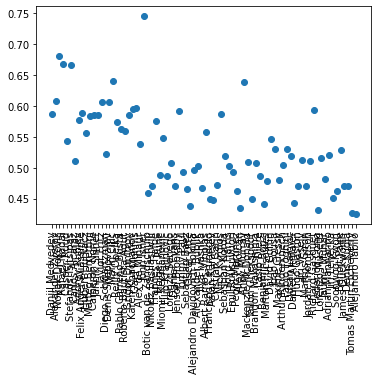

In [32]:
plt.scatter(tennis["player"], tennis["serving_score"])
plt.xticks(rotation = 90)
plt.show()

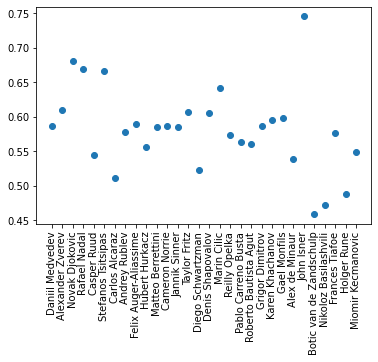

In [33]:
plt.scatter(tennis.iloc[0:30]["player"], tennis.iloc[0:30]["serving_score"])
plt.xticks(rotation = 90)
plt.show()

In [34]:
isner = tennis[tennis["player"] == 'John Isner']

In [35]:
isner

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,195.733333,699.0,234.733333,691.4,138.970667,69.14,643.08,1390.4,712.22,0.745004


In [36]:
isner.iloc[0][avg].to_list()
avg

['avg_double_faults_yr',
 'avg_aces_yr',
 'first_serve',
 '1st_serve_points_won',
 '2nd_serve_points_won',
 'break_points_saved',
 'avg_total_break_points_saved_yr',
 'avg_total_service_games_won_yr']

In [37]:
visualize = ['avg_double_faults_yr', 'avg_aces_yr', 'first_serve', '1st_serve_points_won', 
       '2nd_serve_points_won', 'avg_total_break_points_saved_yr',
       'avg_total_service_games_won_yr']
names = ['Serve Success', 'Aces/yr', "1st serve pct", '1st serve points won', '2nd serve pts won',
         'Avg break points saved/yr', 'Avg service games won/yr']

In [38]:
best_serve = tennis.sort_values(by=['serving_score'], ascending = False)
best_serve = best_serve.iloc[:6]
best_serve

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
24,John Isner,15,2,13634,1674,69,79,56,2936,71,...,195.733333,699.000000,234.733333,691.400000,138.970667,69.140000,643.080000,1390.400000,712.220000,0.745004
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526,0.680701
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429,0.668355
5,Stefanos Tsitsipas,6,1,2329,735,62,76,55,1679,65,...,279.833333,708.333333,367.500000,692.333333,181.891667,145.390000,609.166667,1400.666667,754.556667,0.666681
16,Marin Cilic,17,2,7778,2521,57,77,52,4890,64,...,287.647059,634.705882,369.176471,627.058824,184.094118,144.223529,533.152941,1261.764706,677.376471,0.640921
50,Andy Murray,17,2,6132,2276,58,74,52,5417,62,...,318.647059,658.470588,468.294118,652.823529,197.561176,202.375294,539.945882,1311.294118,742.321176,0.638903


In [39]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=3, 
    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}]],
    subplot_titles=("John Isner", "Novak Djokovic","Aces/yr", "Rafael Nadal", 
    "Stefanos Tsitsipas","Average Service Won", "Marin Cilic", "Andy Murray","1st Serve Pct"),)

fig.add_trace(go.Bar(x = best_serve["player"], y = best_serve["avg_aces_yr"]), row = 1, col = 3)
fig.add_trace(go.Bar(x = best_serve["player"], y = best_serve["avg_total_service_games_won_yr"]), row = 2, col = 3)
fig.add_trace(go.Bar(x = best_serve["player"], y = best_serve["first_serve"]), row = 3, col = 3)

labels = names

rows = [1,1,2,2,3,3]
cols = [1,2,1,2,1,2]

for i in range(0,6):
    values = best_serve.iloc[i][visualize].to_list()
    # Use `hole` to create a donut-like pie chart
    fig.add_trace(go.Pie(labels=names, values=values, hole=.3),
                    row = rows[i] , col = cols[i])

fig.update_layout(height=1200, width=1000,
                  title_text="Top 6 Server's in Men's Tennis")
fig.show()

This plot shows what helps a player most in their serving ranking, shown for the top 6 servers according to my metrics. The amount of aces John Isner serves really helps him achieve a high score, I mean he serves on average 400 more aces than anyone else so that definitely helps his service game. 

The big indicator for success is obviously service games won, the more you win service games, the better player you are. Nadal is helped the most by this statistic, his average aces are pretty low comparatively, but he is also very good under pressure, saving a lot of break points.

Andy Murray and Marin Cilic have the most well rounded service games, both can serve a good amount of aces, save break points, and win service games.

### Return of Serve

John Isner has come up a lot, he is a great server, but in tennis you need a lot of other skills as well, including returning, and playing on return of serve games.

In [40]:
tennis

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_break_points_faced_yr,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score
0,Daniil Medvedev,8,2,2845,1187,60,75,52,1897,63,...,237.125000,528.750000,333.000000,529.750000,149.388750,137.735000,438.862500,1058.500000,576.597500,0.586801
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,301.000000,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444,0.608778
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,316.684211,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526,0.680701
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,300.428571,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429,0.668355
4,Casper Ruud,7,2,986,461,65,72,54,1137,63,...,162.428571,361.285714,203.428571,352.285714,102.330000,84.548571,299.867143,713.571429,384.415714,0.543974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Benoit Paire,15,2,4455,2722,52,74,45,4219,60,...,281.266667,435.266667,256.866667,436.533333,168.760000,100.402667,322.097333,871.800000,422.500000,0.528945
76,James Duckworth,12,2,1096,398,56,72,50,1028,64,...,85.666667,144.083333,61.333333,143.250000,54.826667,22.920000,112.385000,287.333333,135.305000,0.471226
77,Denis Kudla,12,2,1078,637,58,70,51,1390,58,...,115.833333,198.166667,92.416667,199.333333,67.183333,37.873333,150.606667,397.500000,188.480000,0.470659
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,19.600000,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000,0.426250


In [51]:
return_var = ['avg_total_return_games_won_yr', 'break_pts_conv','return_points_won','1st_serve_return_won',
            '2nd_serve_return_won']
tennis['return_score'] = normalized[return_var].mean(axis = 1)
normalized['return_score'] = normalized[return_var].mean(axis = 1)

In [44]:
tennis.sort_values(by = ['return_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score
3,Rafael Nadal,21,2,3856,2066,68,72,57,6309,67,...,703.809524,521.095238,696.809524,201.287143,236.915238,605.276190,1400.619048,842.191429,0.668355,0.550390
2,Novak Djokovic,19,2,6440,2672,65,74,55,6017,66,...,767.263158,540.947368,746.263158,209.011579,238.804211,659.846316,1513.526316,898.650526,0.680701,0.550000
50,Andy Murray,17,2,6132,2276,58,74,52,5417,62,...,658.470588,468.294118,652.823529,197.561176,202.375294,539.945882,1311.294118,742.321176,0.638903,0.514956
1,Alexander Zverev,9,2,3974,1973,65,74,50,2709,61,...,670.777778,403.444444,671.666667,183.610000,167.916667,550.037778,1342.444444,717.954444,0.608778,0.463591
14,Diego Schwartzman,12,2,809,1140,63,66,50,3038,57,...,399.916667,297.583333,405.000000,144.305000,129.600000,291.939167,804.916667,421.539167,0.522393,0.456938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Jiri Lehecka,2,2,50,30,64,67,53,95,63,...,78.500000,31.500000,79.000000,29.925000,12.640000,61.230000,157.500000,73.870000,0.451248,0.299266
78,Tomas Martin Etcheverry,5,2,35,23,71,64,45,98,61,...,24.400000,11.600000,24.200000,11.956000,4.114000,16.836000,48.600000,20.950000,0.426250,0.296000
59,Maxime Cressy,3,2,581,319,63,78,52,221,67,...,183.333333,63.000000,182.333333,49.356667,23.703333,159.500000,365.666667,183.203333,0.479710,0.294694
52,Tallon Griekspoor,7,2,247,122,64,70,50,313,63,...,77.000000,32.285714,76.571429,28.170000,11.485714,60.060000,153.571429,71.545714,0.450226,0.288282


Not surprisingly, we have Rafael Nadal and Novak Djokovic at the top, they are definitely some of the best in the sport both right now, and throughout their careers.

John Isner, the mega-server is near the end in return games, explaining his ranking at the moment, his strong serve game is what makes him so good.

In [52]:
best_return = normalized.sort_values(by=['return_score'], ascending = False)
best_return = best_return.iloc[:6]
best_return

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_service_games_played_yr,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,1.000000,0.67,...,0.914582,0.962497,0.931511,0.943994,0.991951,0.915133,0.922926,0.935674,0.668355,0.550390
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.953009,0.66,...,1.000000,1.000000,1.000000,0.982507,1.000000,1.000000,1.000000,1.000000,0.680701,0.550000
50,Andy Murray,17,2,0.448342,0.778507,0.58,0.74,0.52,0.856453,0.62,...,0.853550,0.862749,0.870594,0.925416,0.844779,0.813533,0.861951,0.821888,0.638903,0.514956
1,Alexander Zverev,9,2,0.289654,0.673808,0.65,0.74,0.50,0.420663,0.61,...,0.870117,0.740241,0.896690,0.855856,0.697953,0.829227,0.883215,0.794126,0.608778,0.463591
14,Diego Schwartzman,12,2,0.056916,0.385971,0.63,0.66,0.50,0.473608,0.57,...,0.505499,0.540256,0.527378,0.659884,0.534688,0.427836,0.516283,0.456408,0.522393,0.456938
33,Jenson Brooksby,1,2,0.006324,0.013476,0.64,0.68,0.52,0.033312,0.56,...,0.720994,0.682727,0.733731,0.783610,0.619821,0.635704,0.727272,0.631457,0.591580,0.449964


In [49]:
viz = ['avg_total_return_games_won_yr', 'break_pts_conv','return_points_won','1st_serve_return_won',
            '2nd_serve_return_won']
names_r = ["Avg Return Games won","Break pts converted", "Pct Return pts won","Pct 1st serve return won",
        "Pct 2nd serve return won"]

In [53]:
fig = make_subplots(rows=3, cols=3, 
    specs=[[{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}],
           [{"type": "pie"}, {"type": "pie"},{"type": "bar"}]],
    subplot_titles=("Rafael Nadal", "Novak Djokovic","Avg Return Won", "Andy Murray", 
    "Alexander Zverev","Pct Return Points Won", "Diego Schwartzman", "Jenson Brooksby","Break pts Converted"),)

fig.add_trace(go.Bar(x = best_return["player"], y = best_return["avg_total_return_games_won_yr"]), row = 1, col = 3)
fig.add_trace(go.Bar(x = best_return["player"], y = best_return["return_points_won"]), row = 2, col = 3)
fig.add_trace(go.Bar(x = best_return["player"], y = best_return["break_pts_conv"]), row = 3, col = 3)


rows = [1,1,2,2,3,3]
cols = [1,2,1,2,1,2]

for i in range(0,6):
    values = best_return.iloc[i][viz].to_list()
    # Use `hole` to create a donut-like pie chart
    fig.add_trace(go.Pie(labels=names_r, values=values, hole=.3),
                    row = rows[i] , col = cols[i])

fig.update_layout(height=1200, width=1000,
                  title_text="Top 6 Returner's in Men's Tennis")
fig.show()

In [55]:
normalized["overall_score"] = (normalized["serving_score"] + normalized["return_score"])/2

In [57]:
normalized.sort_values(by=['overall_score'], ascending = False)

,player,career_length,backhand_type,aces,double_faults,first_serve,1st_serve_points_won,2nd_serve_points_won,break_points_faced,break_points_saved,...,avg_total_break_pts_yr,avg_return_games_played_yr,avg_total_break_points_saved_yr,avg_total_return_games_won_yr,avg_total_service_games_won_yr,avg_total_games_played_yr,avg_total_games_won_yr,serving_score,return_score,overall_score
2,Novak Djokovic,19,2,0.470991,0.915342,0.65,0.74,0.55,0.953009,0.66,...,1.000000,1.000000,0.982507,1.000000,1.000000,1.000000,1.000000,0.680701,0.550000,0.615350
3,Rafael Nadal,21,2,0.280977,0.705943,0.68,0.72,0.57,1.000000,0.67,...,0.962497,0.931511,0.943994,0.991951,0.915133,0.922926,0.935674,0.668355,0.550390,0.609373
50,Andy Murray,17,2,0.448342,0.778507,0.58,0.74,0.52,0.856453,0.62,...,0.862749,0.870594,0.925416,0.844779,0.813533,0.861951,0.821888,0.638903,0.514956,0.576929
5,Stefanos Tsitsipas,6,1,0.168689,0.246026,0.62,0.76,0.55,0.254908,0.65,...,0.672337,0.925311,0.847289,0.601968,0.921184,0.922959,0.835828,0.666681,0.428394,0.547537
1,Alexander Zverev,9,2,0.289654,0.673808,0.65,0.74,0.50,0.420663,0.61,...,0.740241,0.896690,0.855856,0.697953,0.829227,0.883215,0.794126,0.608778,0.463591,0.536184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Jiri Lehecka,2,2,0.001103,0.002419,0.64,0.67,0.53,0.000000,0.63,...,0.037593,0.075894,0.089592,0.036329,0.069041,0.074338,0.060294,0.451248,0.299266,0.375257
63,Daniel Altmaier,8,1,0.017060,0.032135,0.61,0.70,0.46,0.044577,0.64,...,0.039483,0.057370,0.088770,0.038395,0.049924,0.056163,0.046841,0.442648,0.305679,0.374164
36,Oscar Otte,11,2,0.025884,0.057706,0.58,0.75,0.49,0.036369,0.62,...,0.033901,0.045174,0.030597,0.030890,0.045505,0.044458,0.041597,0.437539,0.310178,0.373858
52,Tallon Griekspoor,7,2,0.015589,0.034209,0.64,0.70,0.50,0.035082,0.63,...,0.039078,0.072530,0.080842,0.031410,0.067221,0.071656,0.057646,0.450226,0.288282,0.369254


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b62d15e2-711d-4773-aa8c-7cdf1155e6fd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>